In [206]:
import scanpy as sc
import pandas as pd
import numpy as np

#import math #計算combinations
import random #做隨機抽樣分布

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

from tqdm import tqdm

In [2]:
healthy = sc.read_h5ad("GSE174188/GSE174188_Healthy.h5ad")
healthy

AnnData object with n_obs × n_vars = 486418 × 1999
    obs: 'batch_cov', 'ind_cov', 'Processing_Cohort', 'louvain', 'cg_cov', 'ct_cov', 'L3', 'ind_cov_batch_cov', 'Age', 'Sex', 'pop_cov', 'Status', 'SLE_status'
    var: 'gene_ids'
    uns: 'cg_cov_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'

In [3]:
cell_type = list(set(healthy.obs.cg_cov))
cell_type

['PB', 'Progen', 'T8', 'NK', 'T4', 'cM', 'Prolif', 'cDC', 'pDC', 'B', 'ncM']

In [4]:
sample = list(set(healthy.obs.ind_cov))

personal = {}
for i in sample:
    if i not in personal:
        personal[i] = healthy[healthy.obs.ind_cov == i, :]        
# 將personal進行排序
sorted_personal = dict(sorted(personal.items(), key=lambda x: x[1].obs.Age[0]))


# 排序之後取得年齡
age = []
for i in sorted_personal:
    age.append(sorted_personal[i].obs.Age[0])

# Proportion

## total(人)/total(all)

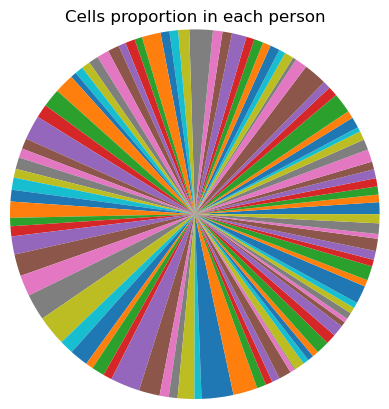

In [5]:
total_cell = 0
person_proportion = []
ID = []
total_cell = healthy.n_obs

for i in sorted_personal:
    total_person_cell = sorted_personal[i].n_obs / total_cell
    ID.append(i)
    person_proportion.append(round(total_person_cell*100,2))
    #print(f"Total(人):{sorted_personal[i].n_obs}\t person Proportion:{round(total_person_cell*100,2)}%")
    
plt.pie(person_proportion, radius = 1.25)
# displaying the title
plt.title("Cells proportion in each person")

# 將圖形保存為PNG文件
plt.savefig('Result_picture/GSE174188/Cells proportion in each person.png', dpi=900)


## cell type(人)/total(人)

個人所有的細胞 分之 各種cell type

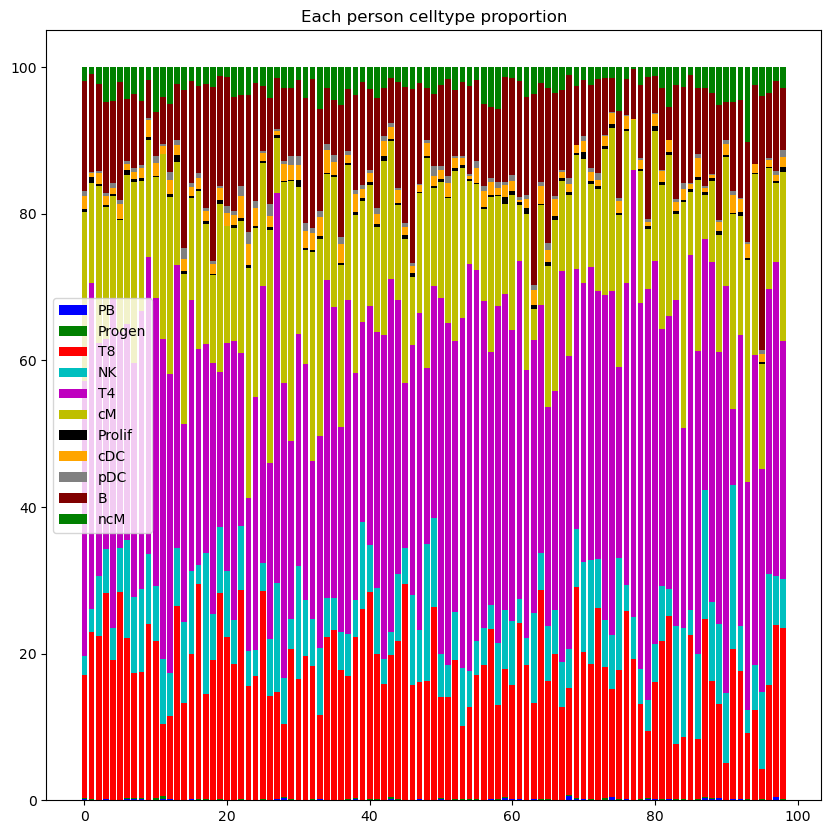

In [313]:
total_personal = []
for i in sorted_personal: # 99人
    person = []
    for j in cell_type: # 11種
        a = sorted_personal[i][sorted_personal[i].obs.cg_cov == j,:].n_obs / sorted_personal[i].n_obs
        person.append(round(a*100, 2))
        #print(f"{i}的{j}佔個人cell type : {round(a*100,2)}%")
    total_personal.append(person)
    
# 創建一個新的圖形
plt.subplots(figsize=(10, 10))

total_array = np.array(total_personal)

# random select 11 types of color
colors = 'b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500', '#808080', '#800000', '#008000'


# 創建一個Patch對象的列表，並將其傳遞給legend函數
legend_elements = [Patch(facecolor=colors[i], label=cell_type[i]) for i in range(len(cell_type))]
plt.legend(handles=legend_elements)

bottom = np.zeros(len(total_array))  # 99 bar
for i in range(len(total_array.T)):  # 11 cell types
    # total_array.T之後每一列同一種cell type中不同的99個人
    plt.bar(range(len(total_array)), total_array.T[i], bottom = bottom, color = colors[i])
    bottom += total_array.T[i]
    
plt.title("Each person celltype proportion")
# 將圖形保存為PNG文件
plt.savefig('Result_picture/GSE174188/Each person celltype proportion.png', dpi=900)
# 顯示圖形
plt.show()

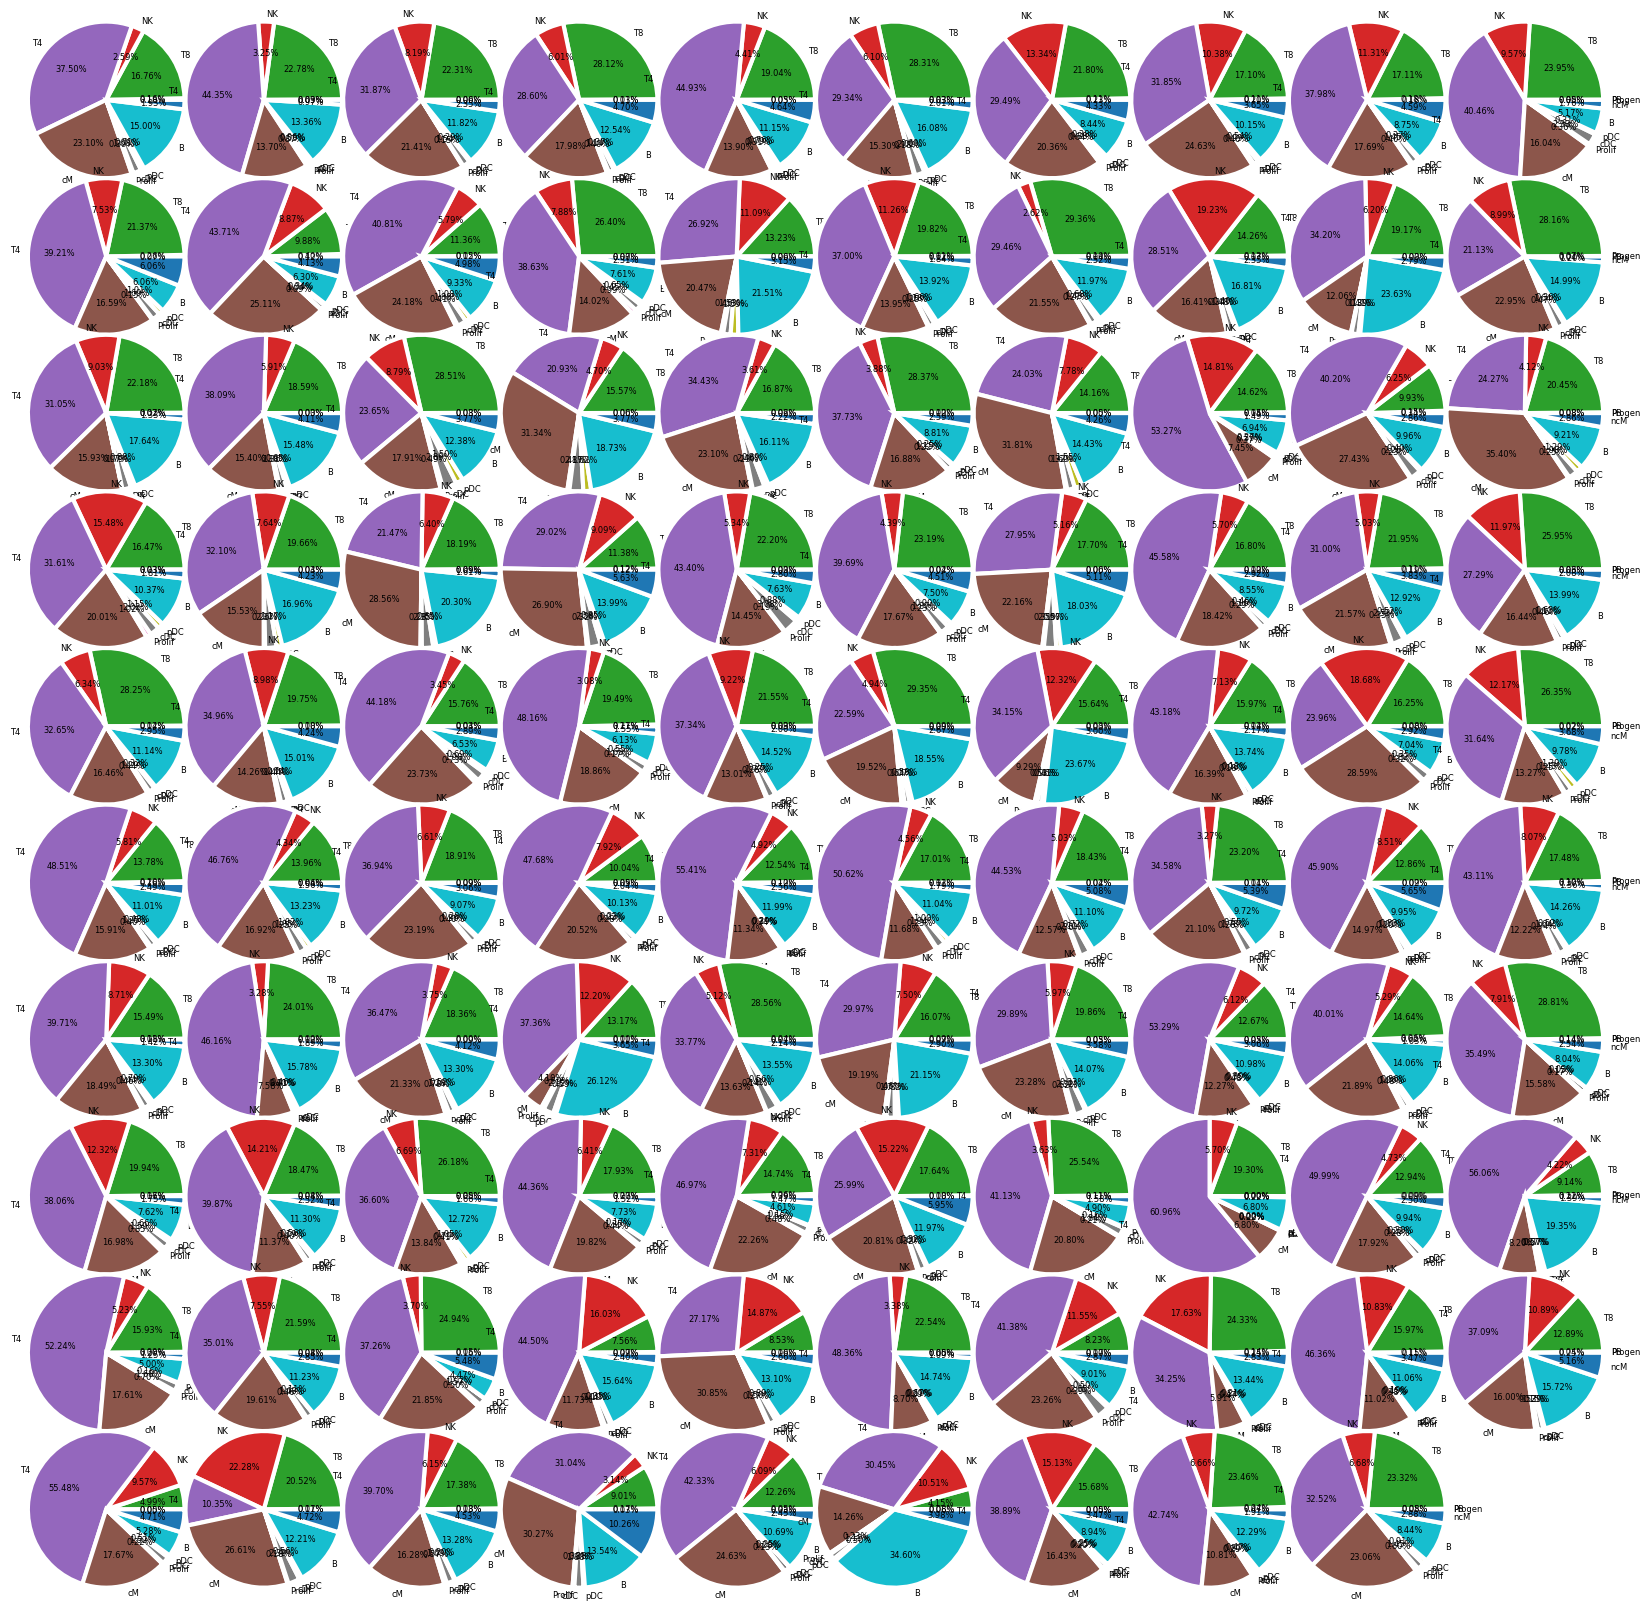

In [97]:
# 創建一個10x10的子圖陣列
fig, axs = plt.subplots(10, 10, figsize=(20,20))

total_personal = []
for i in sorted_personal: # 99人
    person = []
    for j in cell_type: # 11種
        a = sorted_personal[i][sorted_personal[i].obs.cg_cov == j,:].n_obs / sorted_personal[i].n_obs
        person.append(round(a*100, 2))
        #print(f"{i}的{j}佔個人cell type : {round(a*100,2)}%")
    total_personal.append(person)

#畫圖
for i in range(len(total_personal)):
    ax = axs[i//10, i%10]  # 選擇子圖
    ax.pie(total_personal[i], radius = 1.5, labels = cell_type, autopct='%.2f%%', textprops={'size':6}, wedgeprops={'linewidth':3,'edgecolor':'w'})
    
# 刪除最後一格空的位置
plt.delaxes(axs[9, 9])

# 將圖形保存為PNG文件
plt.savefig('Result_picture/GSE174188/Each person celltype proportion.png', dpi=900)
plt.show()

## cell type(人)/cell type(total)

In [302]:
pie_celltype = {}
celltype_stackbar = []
count = 0

for i in cell_type:
    # cell type total
    a = healthy[healthy.obs.cg_cov == i, :]
    pie_celltype[i] = []
    celltype_stackbar.append([])
    # cell type 
    for j in sorted_personal:
        # cell type by personal
        b = sorted_personal[j][sorted_personal[j].obs.cg_cov == i, :]
        # calculate proportion 
        c = b.n_obs / a.n_obs        
        # 放入這個cell type不同人的比例
        pie_celltype[i].append(round(c*100, 2))        
        #print(f"{j} 的 {i} 佔所有 {i} : {round(c*100, 2)}%")
        celltype_stackbar[count].append(round(c*100, 2))
    count += 1 

In [333]:
len(celltype_stackbar_array.T)

99

In [315]:
celltype_stackbar_array = np.array(celltype_stackbar)
celltype_stackbar_array





bottom = np.zeros(len(total_array))  # 99 bar
for i in range(len(total_array.T)):  # 11 cell types
    # total_array.T之後每一列同一種cell type中不同的99個人
    plt.bar(range(len(total_array)), total_array.T[i], bottom = bottom, color = colors[i])
    bottom += total_array.T[i]
    
plt.title("Each person celltype proportion")
# 將圖形保存為PNG文件
plt.savefig('Result_picture/GSE174188/Each person celltype proportion.png', dpi=900)
# 顯示圖形
plt.show()

99

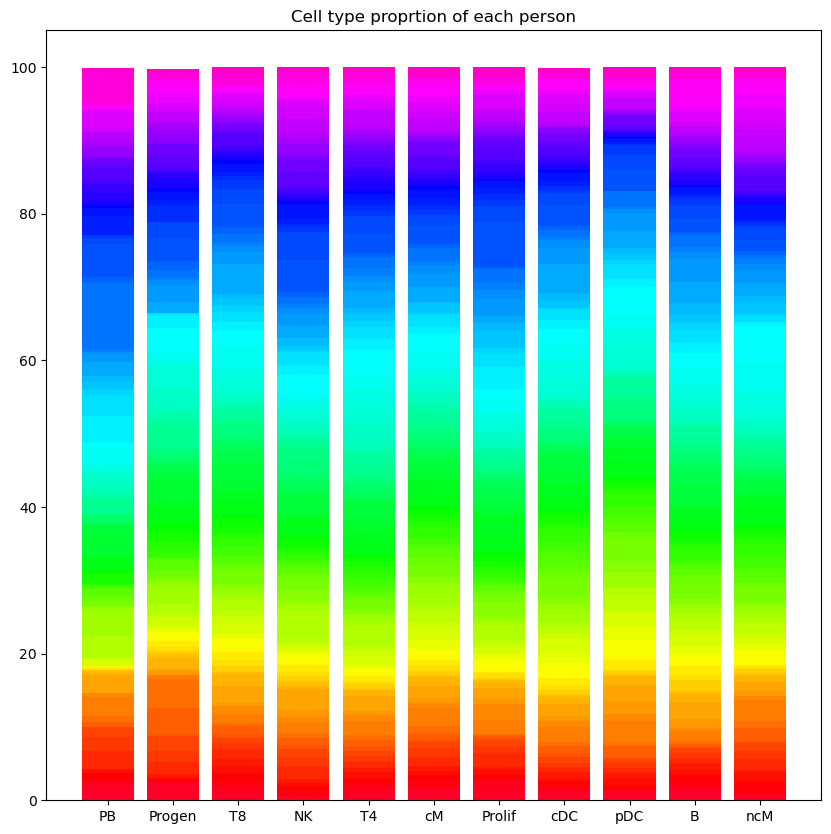

In [338]:
# 創建一個新的圖形
plt.subplots(figsize=(10, 10))
# 獲取colormap
cm = plt.get_cmap('gist_rainbow')


bottom = np.zeros(len(celltype_stackbar_array)) # 11 bar
# 使用bar函數繪製堆疊柱狀圖
for i in range(len(celltype_stackbar_array.T)):
    # celltype_stackbar_array是每一列同一種cell type中不同的99個人
    plt.bar(range(len(celltype_stackbar_array)), celltype_stackbar_array.T[i], bottom = bottom, color = cm(1.*i/len(celltype_stackbar_array.T)))
    bottom += celltype_stackbar_array.T[i]

    
plt.xticks(range(len(cell_type)), cell_type)
plt.title("Cell type proprtion of each person")
# 將圖形保存為PNG文件
plt.savefig('Result_picture/GSE174188/Cell type proprtion of each person.png', dpi=900)
# 顯示圖形
plt.show()

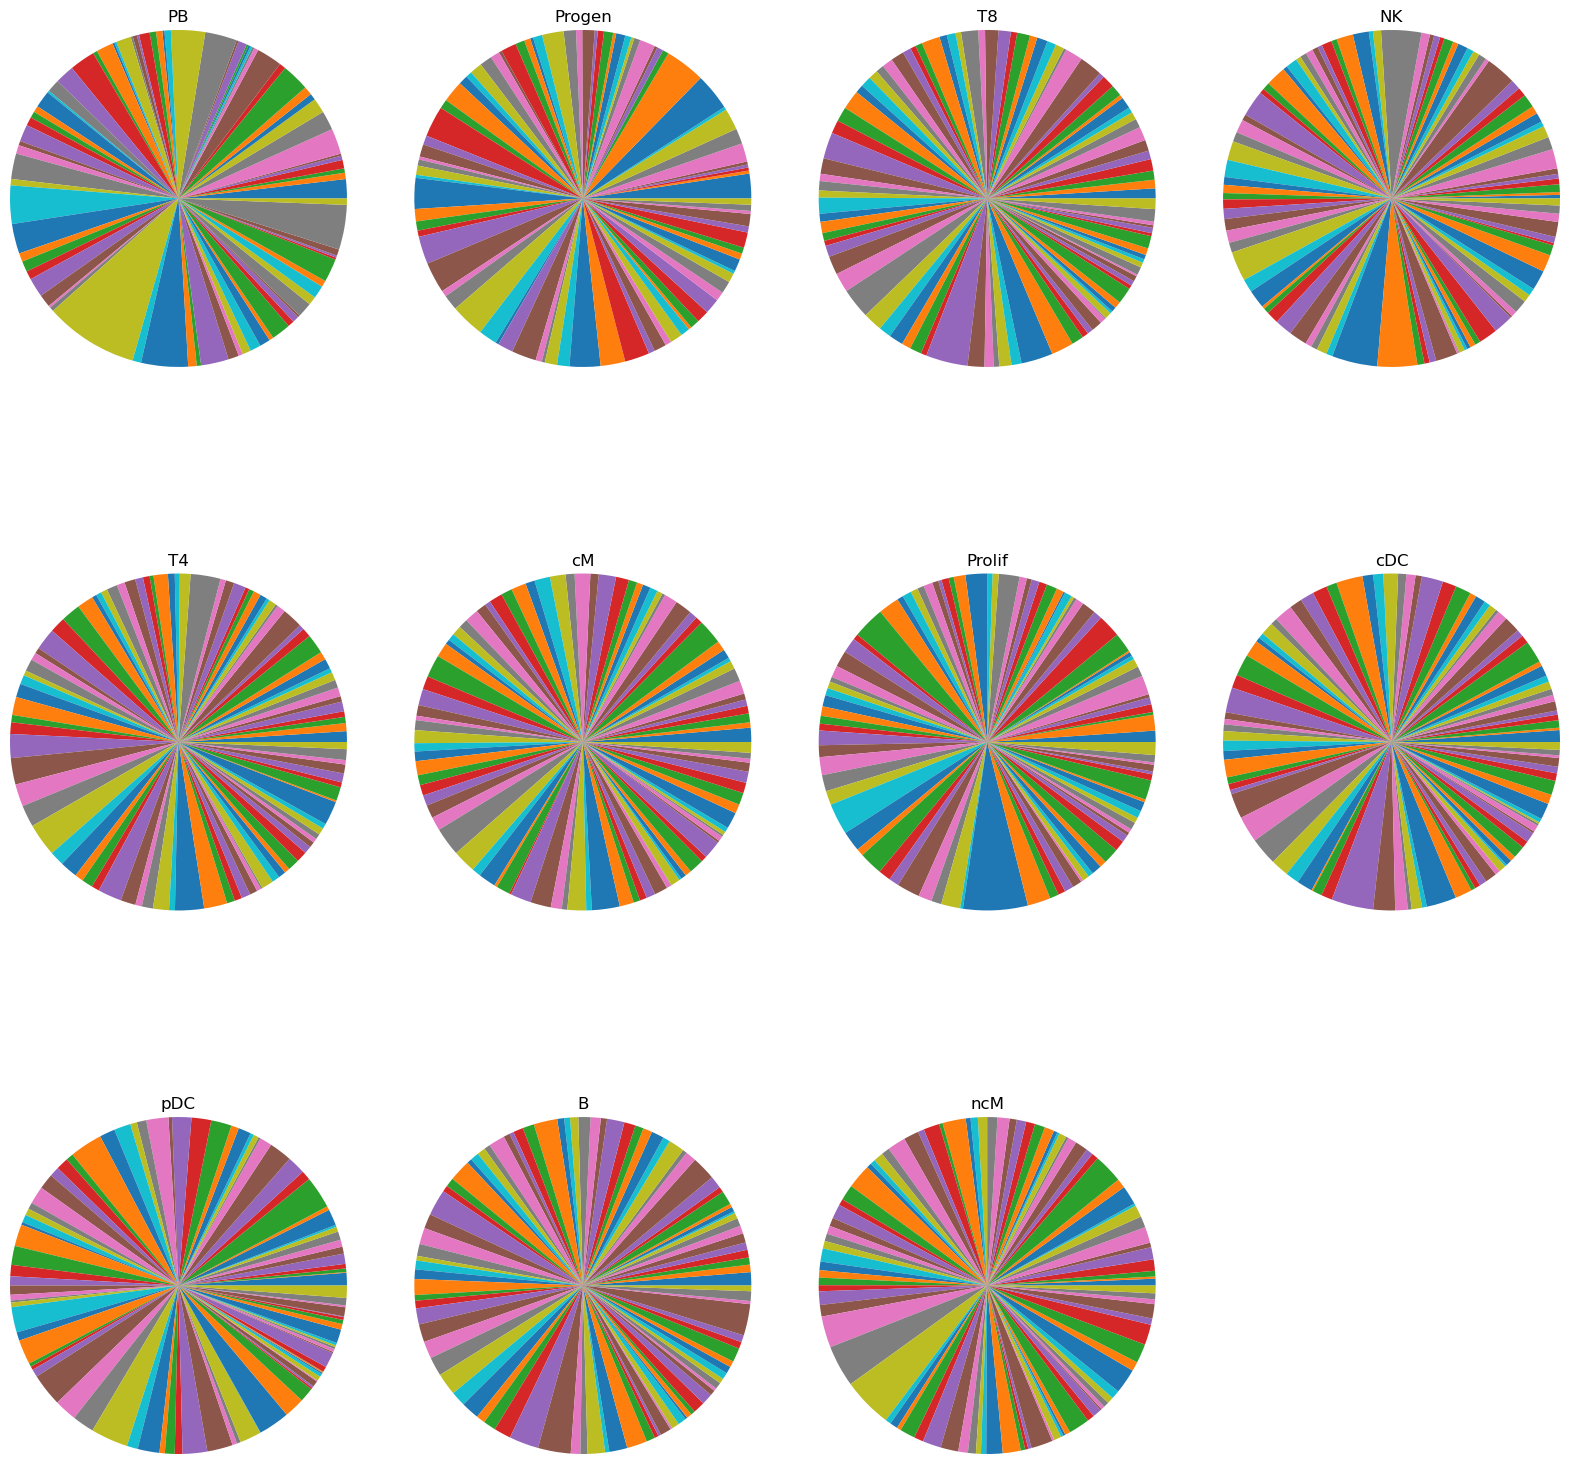

In [8]:
# 創建一個10x10的子圖陣列
fig, axs = plt.subplots(3, 4, figsize=(20,20))
#畫圖
count = 0
for i in pie_celltype:
    ax = axs[count//4, count%4]  # 選擇子圖
    ax.pie(pie_celltype[i], radius = 1.25) # autopct='%.2f%%', textprops={'size':6}
    ax.set_title(i)  # 添加標題
    
    count += 1
    
# 刪除最後一格空的位置
plt.delaxes(axs[2, 3])

# 將圖形保存為PNG文件
plt.savefig('Result_picture/GSE174188/Cell type proprtion of each person.png', dpi=900)
plt.show()

# Spearman Correlation

In [9]:
from scipy.stats import spearmanr

def spearman_correlation(adata, cell):
    corr = []
    pvalue = []
    # extract cell type
    cell_type = adata[adata.obs.cg_cov == cell,:]
    # get age and turn into float
    age_float = [float(i) for i in cell_type.obs.Age]
    for gene in cell_type.X.T: # cell_type.X.T才會是基因
        spearman_corr, p_value = spearmanr(age_float, gene)
        corr.append(spearman_corr)
        pvalue.append(p_value)
    
    return corr, pvalue

In [10]:
# ['NK', 'Prolif', 'cDC', 'T8', 'ncM', 'T4', 'cM', 'B', 'PB', 'pDC', 'Progen']
spearman = {}
for i in cell_type:
    corr, pvalue = spearman_correlation(healthy, i)
    spearman[i] = {"corr" : corr, "pvalue" : pvalue}# Pearson Correlation

In [11]:
# 去除p值為0的部分
non_zero_indices = np.nonzero(spearman["NK"]["pvalue"])[0]
# 留下對應的gene
genes_non_zero = np.array(healthy.var.index)[non_zero_indices]

p_values_non_zero = []
for i in non_zero_indices:
    p_values_non_zero.append(spearman["NK"]["pvalue"][i])

# Pearson Correlation

In [12]:
from scipy.stats import pearsonr

def pearson_correlation(adata, cell):
    corr = []
    pvalue = []
    # extract cell type
    cell_type = adata[adata.obs.cg_cov == cell,:]
    # get age and turn into float
    age_float = [float(i) for i in cell_type.obs.Age]
    for gene in cell_type.X.T: # cell_type.X.T才會是基因
        pearson_corr, p_value = pearsonr(age_float, gene)
        corr.append(pearson_corr)
        pvalue.append(p_value)
    
    return corr, pvalue

In [36]:
# ['B', 'T4', 'pDC', 'PB', 'NK', 'T8', 'ncM', 'cDC', 'cM', 'Prolif', 'Progen']
pearson = {}
for i in cell_type:
    corr, pvalue = pearson_correlation(healthy, i)
    pearson[i] = {"corr" : corr, "pvalue" : pvalue}

In [37]:
pearson

{'PB': {'corr': [-0.0020038597984875887,
   -0.056378162015317104,
   0.03717463230936394,
   -0.014155113034493703,
   -0.01358171335684459,
   -0.02999197564772777,
   -0.008909647040234708,
   -0.0041206861607586895,
   -0.019019919812968487,
   -0.010226078528698647,
   -0.04006171651330846,
   0.013836100026211301,
   -0.04819704343105089,
   -0.008289140001015051,
   -0.036509187431168516,
   -0.04572622467243039,
   0.13693628808308897,
   -0.026725315682782056,
   -0.040104322251450324,
   0.2389136432081804,
   0.12410222495615084,
   -0.04234870373180574,
   0.09036976705260788,
   0.013232710643095927,
   0.06637331959605756,
   -0.0068153200980325,
   -0.03635723340980582,
   -0.0076429305561995405,
   0.07463091582857045,
   0.006194869811104457,
   0.012671496365033267,
   -0.008289197882277943,
   0.07089368477222469,
   -0.028973151088357785,
   -0.012623871416453783,
   -0.031966246821330715,
   -0.016266273670596403,
   -0.06196342585459998,
   0.07868294986410498,
  

# Visualize correlation

In [25]:
def visualize_correlation(cell_type, correlation_method, title):# correlation的直方圖
    for i in cell_type:

        # 分類
        positive = [j for j in correlation_method[i]["corr"] if j > 0 ]
        negative = [j for j in correlation_method[i]["corr"] if j < 0 ]

        # 計算每組的數量
        counts = [len(positive), len(negative)]

        # 計算總數
        total_count = len(positive) + len(negative)

        # 計算每組的百分比
        positive_percentage = len(positive) / total_count * 100
        negative_percentage = len(negative) / total_count * 100

        # 繪製堆疊直方圖
        plt.bar([i], [positive_percentage], color='b')
        plt.bar([i], [negative_percentage], bottom=positive_percentage, color='r')


    #    # 計算所有相關性值的總和
    #    total_corr = sum(pearson[i]["corr"])
    #    if total_corr > 0:
    #        print(f"{i} 的整體相關性是正相關: {total_corr}")
    #    elif total_corr < 0:
    #        print(f"{i} 的整體相關性是負相關: {total_corr}")
    #    else:
    #        print(f"{i} 的整體相關性是無相關: {total_corr}")


    # 添加標籤和標題
    plt.ylabel("Percentage (%)")
    plt.title(f"Histogram of {title} Correlations")
    plt.legend(['>0', '<0'], loc='upper left')    
    # 將圖形保存為PNG文件
    plt.savefig(f'Result_picture/GSE174188/Histogram of {title} Correlations.png', dpi=900)
    
    plt.show()  

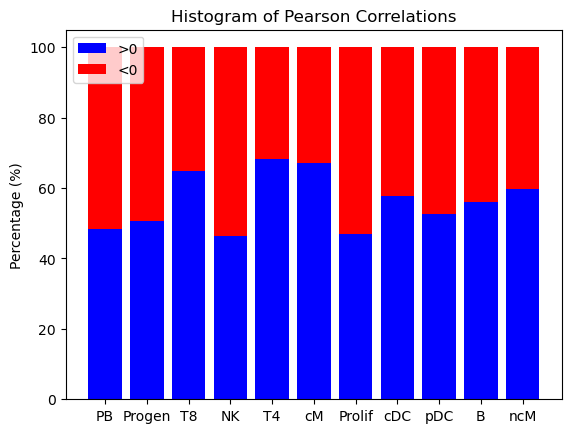

In [26]:
visualize_correlation(cell_type, pearson, "Pearson")

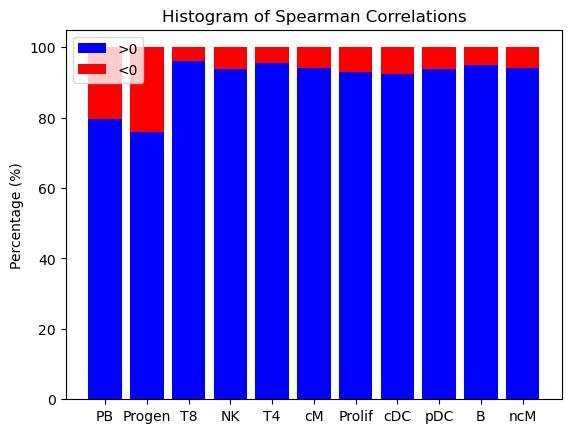

In [29]:
visualize_correlation(cell_type, spearman, "Spearman")

# GO & KEGG

所有的gene都放進去

In [90]:
# For GO & KEGG 
# All genes
positive = {}
negative = {}
# each gene 
for i in cell_type:
    positive[i] = []
    negative[i] = []
    for j in range(len(pearson[i]["corr"])):
        if pearson[i]["corr"][j] > 0:
            positive[i].append(healthy.var.index[j])
        elif pearson[i]["corr"][j] < 0:
            negative[i].append(healthy.var.index[j])
            
# 現在裡面包的是 positive or negative的 dictionary不同cell type的 gene
# positive[cell type] = gene, correlation > 0
# negative[cell type] = gene, correlation < 0

只放前兩百個genes

In [92]:
# For GO & KEGG 
# All genes
positive = {}
negative = {}
# each gene 
for i in cell_type:
    positive[i] = []
    negative[i] = []
    
    pair= list(zip(healthy.var.index, pearson[i]["corr"]))
    # 由大到小排序
    sorted_pair = sorted(pair, key = lambda x: x[1], reverse=True)
    
    for j in range(200):
        if sorted_pair[j][1] > 0:
            positive[i].append(sorted_pair[j][0])
        if sorted_pair[-j-1][1] < 0:
            negative[i].append(sorted_pair[-j][0])
            
# 現在裡面包的是 positive or negative的 dictionary不同cell type的 gene
# positive[cell type] = gene, correlation > 0
# negative[cell type] = gene, correlation < 0

In [93]:
# 確認每個cell type有多少個 genes
print("Negative :")
for i in negative:
    print("\t",i,":",len(negative[i]))
    
print("Positive :")
for i in positive:
    print("\t",i,":",len(positive[i]))

Negative :
	 PB : 200
	 Progen : 200
	 T8 : 200
	 NK : 200
	 T4 : 200
	 cM : 200
	 Prolif : 200
	 cDC : 200
	 pDC : 200
	 B : 200
	 ncM : 200
Positive :
	 PB : 200
	 Progen : 200
	 T8 : 200
	 NK : 200
	 T4 : 200
	 cM : 200
	 Prolif : 200
	 cDC : 200
	 pDC : 200
	 B : 200
	 ncM : 200


# pickle 測試用


import pickle

with open('negative_gene_list.pickle','wb') as f:

    pickle.dump(negative, f)
    
    
with open('gene_list.pickle', 'rb') as f:

    test = pickle.load(f)

In [94]:
import pandas as pd

pd_negative = pd.DataFrame.from_dict(negative, orient='index')
pd_positive = pd.DataFrame.from_dict(positive, orient='index')
# 在Python中保存為.csv文件
pd_negative.to_csv('pearson_negative_celltype_genes_top200.csv', index=True)
pd_positive.to_csv('pearson_positive_celltype_genes_top200.csv', index=True)

# KEGG pathyway

In [21]:
from bioservices import KEGG    #!pip install bioservices

In [22]:
result = healthy.uns['rank_genes_groups']
groups = result['names'].dtype.names

# 使用bioservices进行KEGG富集分析
kegg = KEGG()

for group in groups:
    # 確保每個基因都被轉換為字符串
    gene_list = result['names'][group].tolist()
    print(f'Group {group}:')
    for gene in gene_list:
        # 使用get_pathway_by_gene方法來獲取這些基因參與的路徑
        pathways = kegg.get_pathway_by_gene(gene, 'hsa')    # hsa:Homo sapiens (human)
        print(pathways)

WARNING [bioservices.KEGG:130]:  The URL (http://rest.kegg.jp) provided cannot be reached.


Group 0:
{'hsa04970': 'Salivary secretion'}
{'hsa04657': 'IL-17 signaling pathway'}
{'hsa04657': 'IL-17 signaling pathway'}
{'hsa04216': 'Ferroptosis', 'hsa04217': 'Necroptosis', 'hsa04978': 'Mineral absorption'}
{'hsa04380': 'Osteoclast differentiation', 'hsa04650': 'Natural killer cell mediated cytotoxicity'}
None
{'hsa04142': 'Lysosome', 'hsa04145': 'Phagosome', 'hsa04210': 'Apoptosis', 'hsa04612': 'Antigen processing and presentation', 'hsa05152': 'Tuberculosis'}
{'hsa01522': 'Endocrine resistance', 'hsa04010': 'MAPK signaling pathway', 'hsa04024': 'cAMP signaling pathway', 'hsa04210': 'Apoptosis', 'hsa04380': 'Osteoclast differentiation', 'hsa04620': 'Toll-like receptor signaling pathway', 'hsa04657': 'IL-17 signaling pathway', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04660': 'T cell receptor signaling pathway', 'hsa04662': 'B cell receptor signaling pathway', 'hsa04668': 'TNF signaling pathway', 'hsa04713': 'Circadian entrainmen

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
None
None
None
None
{'hsa04216': 'Ferroptosis', 'hsa04217': 'Necroptosis', 'hsa04978': 'Mineral absorption'}
None
None
{'hsa04080': 'Neuroactive ligand-receptor interaction', 'hsa04979': 'Cholesterol metabolism', 'hsa05166': 'Human T-cell leukemia virus 1 infection'}
{'hsa00330': 'Arginine and proline metabolism', 'hsa01100': 'Metabolic pathways', 'hsa04216': 'Ferroptosis'}
None
{'hsa04071': 'Sphingolipid signaling pathway', 'hsa04072': 'Phospholipase D signaling pathway', 'hsa04611': 'Platelet activation', 'hsa04625': 'C-type lectin receptor signaling pathway', 'hsa04650': 'Natural killer cell mediated cytotoxicity', 'hsa04664': 'Fc epsilon RI signaling pathway', 'hsa05152': 'Tuberculosis', 'hsa05310': 'Asthma'}
{'hsa04142': 'Lysosome', 'hsa05170': 'Human immunodeficiency virus 1 infection'}
Group 1:
{'hsa03010': 'Ribosome', 'hsa05171': 'Coronavirus disease - COVID-19'}
{'hsa03010': 'Ribosome', 'hsa05171': 'Coronavirus disease - COVID-19'}
{'hsa04060': 'Cytokine-cytokine receptor

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa04060': 'Cytokine-cytokine receptor interaction', 'hsa04068': 'FoxO signaling pathway', 'hsa04151': 'PI3K-Akt signaling pathway', 'hsa04630': 'JAK-STAT signaling pathway', 'hsa04640': 'Hematopoietic cell lineage', 'hsa05200': 'Pathways in cancer', 'hsa05340': 'Primary immunodeficiency'}


WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
None
{'hsa00230': 'Purine metabolism', 'hsa01100': 'Metabolic pathways', 'hsa05222': 'Small cell lung cancer', 'hsa05223': 'Non-small cell lung cancer'}
{'hsa04310': 'Wnt signaling pathway', 'hsa04390': 'Hippo signaling pathway', 'hsa04520': 'Adherens junction', 'hsa04916': 'Melanogenesis', 'hsa04934': 'Cushing syndrome', 'hsa04936': 'Alcoholic liver disease', 'hsa05132': 'Salmonella infection', 'hsa05167': 'Kaposi sarcoma-associated herpesvirus infection', 'hsa05200': 'Pathways in cancer', 'hsa05210': 'Colorectal cancer', 'hsa05213': 'Endometrial cancer', 'hsa05215': 'Prostate cancer', 'hsa05216': 'Thyroid cancer', 'hsa05217': 'Basal cell carcinoma', 'hsa05221': 'Acute myeloid leukemia', 'hsa05224': 'Breast cancer', 'hsa05225': 'Hepatocellular carcinoma', 'hsa05226': 'Gastric cancer', 'hsa05412': 'Arrhythmogenic right ventricular cardiomyopathy'}
{'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hs

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04660': 'T cell receptor signaling pathway', 'hsa05142': 'Chagas disease', 'hsa05162': 'Measles', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05169': 'Epstein-Barr virus infection', 'hsa05170': 'Human immunodeficiency virus 1 infection', 'hsa05235': 'PD-L1 expression and PD-1 checkpoint pathway in cancer', 'hsa05340': 'Primary immunodeficiency'}
None
None
{'hsa04310': 'Wnt signaling pathway', 'hsa04390': 'Hippo signaling pathway', 'hsa04520': 'Adherens junction', 'hsa04550': 'Signaling pathways regulating pluripotency of stem cells', 'hsa04916': 'Melanogenesis', 'hsa04934': 'Cushing syndrome', 'hsa04936': 'Alcoholic liver disease', 'hsa05132': 'Salmonella infection', 'hsa05165': 'Human papillomavirus infection', 'hsa05167': 'Kaposi sarcoma-associated herpesvirus infection', 'hsa05200': 'Pathways in cancer', 'hsa05210': 'Colorectal c

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa05144': 'Malaria'}
{'hsa04142': 'Lysosome'}
{'hsa01521': 'EGFR tyrosine kinase inhibitor resistance', 'hsa01522': 'Endocrine resistance', 'hsa01524': 'Platinum drug resistance', 'hsa04012': 'ErbB signaling pathway', 'hsa04014': 'Ras signaling pathway', 'hsa04015': 'Rap1 signaling pathway', 'hsa04024': 'cAMP signaling pathway', 'hsa04062': 'Chemokine signaling pathway', 'hsa04066': 'HIF-1 signaling pathway', 'hsa04068': 'FoxO signaling pathway', 'hsa04070': 'Phosphatidylinositol signaling system', 'hsa04071': 'Sphingolipid signaling pathway', 'hsa04072': 'Phospholipase D signaling pathway', 'hsa04140': 'Autophagy - animal', 'hsa04150': 'mTOR signaling pathway', 'hsa04151': 'PI3K-Akt signaling pathway', 'hsa04152': 'AMPK signaling pathway', 'hsa04210': 'Apoptosis', 'hsa04211': 'Longevity regulating pathway', 'hsa04213': 'Longevity regulating pathway - multiple species', 'hsa04218': 'Cellular senescence', 'hsa04360': 'Axon guidance', 'hsa04370': 'VEGF signaling pathway', 'hsa043

{'hsa04145': 'Phagosome', 'hsa04514': 'Cell adhesion molecules', 'hsa04612': 'Antigen processing and presentation', 'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04672': 'Intestinal immune network for IgA production', 'hsa04940': 'Type I diabetes mellitus', 'hsa05140': 'Leishmaniasis', 'hsa05145': 'Toxoplasmosis', 'hsa05150': 'Staphylococcus aureus infection', 'hsa05152': 'Tuberculosis', 'hsa05164': 'Influenza A', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05168': 'Herpes simplex virus 1 infection', 'hsa05169': 'Epstein-Barr virus infection', 'hsa05310': 'Asthma', 'hsa05320': 'Autoimmune thyroid disease', 'hsa05321': 'Inflammatory bowel disease', 'hsa05322': 'Systemic lupus erythematosus', 'hsa05323': 'Rheumatoid arthritis', 'hsa05330': 'Allograft rejection', 'hsa05332': 'Graft-versus-host disease', 'hsa05416': 'Viral myocarditis'}
{'hsa04151': 'PI3K-Akt signaling pathway'}
{'hsa040

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa04640': 'Hematopoietic cell lineage', 'hsa05169': 'Epstein-Barr virus infection'}
None


WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
None
{'hsa04145': 'Phagosome', 'hsa04514': 'Cell adhesion molecules', 'hsa04612': 'Antigen processing and presentation', 'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04672': 'Intestinal immune network for IgA production', 'hsa04940': 'Type I diabetes mellitus', 'hsa05140': 'Leishmaniasis', 'hsa05145': 'Toxoplasmosis', 'hsa05150': 'Staphylococcus aureus infection', 'hsa05152': 'Tuberculosis', 'hsa05164': 'Influenza A', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05168': 'Herpes simplex virus 1 infection', 'hsa05169': 'Epstein-Barr virus infection', 'hsa05310': 'Asthma', 'hsa05320': 'Autoimmune thyroid disease', 'hsa05321': 'Inflammatory bowel disease', 'hsa05322': 'Systemic lupus erythematosus', 'hsa05323': 'Rheumatoid arthritis', 'hsa05330': 'Allograft rejection', 'hsa05332': 'Graft-versus-host disease', 'hsa05416': 'Viral myocarditis'}
{'hsa01524': 'Platinum drug resistance', 

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
None
{'hsa04142': 'Lysosome', 'hsa04210': 'Apoptosis'}
{'hsa04612': 'Antigen processing and presentation', 'hsa04650': 'Natural killer cell mediated cytotoxicity', 'hsa05332': 'Graft-versus-host disease'}
{'hsa04060': 'Cytokine-cytokine receptor interaction', 'hsa04061': 'Viral protein interaction with cytokine and cytokine receptor', 'hsa04062': 'Chemokine signaling pathway', 'hsa04064': 'NF-kappa B signaling pathway', 'hsa04620': 'Toll-like receptor signaling pathway', 'hsa04623': 'Cytosolic DNA-sensing pathway', 'hsa05163': 'Human cytomegalovirus infection'}
{'hsa04210': 'Apoptosis', 'hsa04650': 'Natural killer cell mediated cytotoxicity', 'hsa04940': 'Type I diabetes mellitus', 'hsa05202': 'Transcriptional misregulation in cancer', 'hsa05320': 'Autoimmune thyroid disease', 'hsa05330': 'Allograft rejection', 'hsa05332': 'Graft-versus-host disease'}
None
None
{'hsa04514': 'Cell adhesion molecules', 'hsa04670': 'Leukocyte transendothelial migration'}
{'hsa04640': 'Hematopoietic c

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04660': 'T cell receptor signaling pathway', 'hsa05142': 'Chagas disease', 'hsa05162': 'Measles', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05169': 'Epstein-Barr virus infection', 'hsa05170': 'Human immunodeficiency virus 1 infection', 'hsa05235': 'PD-L1 expression and PD-1 checkpoint pathway in cancer', 'hsa05340': 'Primary immunodeficiency'}
Group 5:
{'hsa04514': 'Cell adhesion molecules', 'hsa04612': 'Antigen processing and presentation', 'hsa04640': 'Hematopoietic cell lineage', 'hsa04660': 'T cell receptor signaling pathway', 'hsa05135': 'Yersinia infection', 'hsa05340': 'Primary immunodeficiency'}
{'hsa03010': 'Ribosome', 'hsa05171': 'Coronavirus disease - COVID-19'}
{'hsa03010': 'Ribosome', 'hsa05171': 'Coronavirus disease - COVID-19'}


WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa04060': 'Cytokine-cytokine receptor interaction', 'hsa04068': 'FoxO signaling pathway', 'hsa04151': 'PI3K-Akt signaling pathway', 'hsa04630': 'JAK-STAT signaling pathway', 'hsa04640': 'Hematopoietic cell lineage', 'hsa05200': 'Pathways in cancer', 'hsa05340': 'Primary immunodeficiency'}
{'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04660': 'T cell receptor signaling pathway', 'hsa05142': 'Chagas disease', 'hsa05162': 'Measles', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05169': 'Epstein-Barr virus infection', 'hsa05170': 'Human immunodeficiency virus 1 infection', 'hsa05235': 'PD-L1 expression and PD-1 checkpoint pathway in cancer', 'hsa05340': 'Primary immunodeficiency'}
{'hsa04060': 'Cytokine-cytokine receptor interaction', 'hsa04061': 'Viral protein interaction with cytokine and cytokine receptor', 'hsa04062': 'Chemokine signaling pathway'}
{'hsa04514': 'Cell adhesion 

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
None
None
None
None
{'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04660': 'T cell receptor signaling pathway', 'hsa05142': 'Chagas disease', 'hsa05162': 'Measles', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05169': 'Epstein-Barr virus infection', 'hsa05170': 'Human immunodeficiency virus 1 infection', 'hsa05235': 'PD-L1 expression and PD-1 checkpoint pathway in cancer', 'hsa05340': 'Primary immunodeficiency'}
{'hsa04310': 'Wnt signaling pathway', 'hsa04390': 'Hippo signaling pathway', 'hsa04520': 'Adherens junction', 'hsa04916': 'Melanogenesis', 'hsa04934': 'Cushing syndrome', 'hsa04936': 'Alcoholic liver disease', 'hsa05132': 'Salmonella infection', 'hsa05167': 'Kaposi sarcoma-associated herpesvirus infection', 'hsa05200': 'Pathways in cancer', 'hsa05210': 'Colorectal cancer', 'hsa05213': 'Endometrial cancer', 'hsa05215': 'Prostate cancer', 'hsa05216': 'Thyroid cancer', 'hsa0

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
None
{'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04660': 'T cell receptor signaling pathway', 'hsa05142': 'Chagas disease', 'hsa05162': 'Measles', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05169': 'Epstein-Barr virus infection', 'hsa05170': 'Human immunodeficiency virus 1 infection', 'hsa05235': 'PD-L1 expression and PD-1 checkpoint pathway in cancer'}
{'hsa04310': 'Wnt signaling pathway', 'hsa04390': 'Hippo signaling pathway', 'hsa04520': 'Adherens junction', 'hsa04550': 'Signaling pathways regulating pluripotency of stem cells', 'hsa04916': 'Melanogenesis', 'hsa04934': 'Cushing syndrome', 'hsa04936': 'Alcoholic liver disease', 'hsa05132': 'Salmonella infection', 'hsa05165': 'Human papillomavirus infection', 'hsa05167': 'Kaposi sarcoma-associated herpesvirus infection', 'hsa05200': 'Pathways in cancer', 'hsa05210': 'Colorectal cancer', 'hsa05213': 'Endometrial cancer', 'hs

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
None
Group 7:
{'hsa04970': 'Salivary secretion'}
{'hsa04216': 'Ferroptosis', 'hsa04217': 'Necroptosis', 'hsa04978': 'Mineral absorption'}
{'hsa04380': 'Osteoclast differentiation', 'hsa04650': 'Natural killer cell mediated cytotoxicity'}
None
{'hsa04142': 'Lysosome', 'hsa04145': 'Phagosome', 'hsa04210': 'Apoptosis', 'hsa04612': 'Antigen processing and presentation', 'hsa05152': 'Tuberculosis'}
{'hsa04970': 'Salivary secretion'}
{'hsa04216': 'Ferroptosis', 'hsa04217': 'Necroptosis', 'hsa04978': 'Mineral absorption'}
None
{'hsa00240': 'Pyrimidine metabolism', 'hsa00983': 'Drug metabolism - other enzymes', 'hsa01100': 'Metabolic pathways', 'hsa01232': 'Nucleotide metabolism', 'hsa05219': 'Bladder cancer'}
None
None
{'hsa04071': 'Sphingolipid signaling pathway', 'hsa04072': 'Phospholipase D signaling pathway', 'hsa04611': 'Platelet activation', 'hsa04625': 'C-type lectin receptor signaling pathway', 'hsa04650': 'Natural killer cell mediated cytotoxicity', 'hsa04664': 'Fc epsilon RI si

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
None
{'hsa04142': 'Lysosome', 'hsa04979': 'Cholesterol metabolism'}
{'hsa04145': 'Phagosome', 'hsa04514': 'Cell adhesion molecules', 'hsa04612': 'Antigen processing and presentation', 'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04672': 'Intestinal immune network for IgA production', 'hsa04940': 'Type I diabetes mellitus', 'hsa05140': 'Leishmaniasis', 'hsa05145': 'Toxoplasmosis', 'hsa05150': 'Staphylococcus aureus infection', 'hsa05152': 'Tuberculosis', 'hsa05164': 'Influenza A', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05168': 'Herpes simplex virus 1 infection', 'hsa05169': 'Epstein-Barr virus infection', 'hsa05310': 'Asthma', 'hsa05320': 'Autoimmune thyroid disease', 'hsa05321': 'Inflammatory bowel disease', 'hsa05322': 'Systemic lupus erythematosus', 'hsa05323': 'Rheumatoid arthritis', 'hsa05330': 'Allograft rejection', 'hsa05332': 'Graft-versus-host disease', 'hsa05416':

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
None
None
{'hsa04010': 'MAPK signaling pathway', 'hsa04064': 'NF-kappa B signaling pathway', 'hsa04145': 'Phagosome', 'hsa04620': 'Toll-like receptor signaling pathway', 'hsa04640': 'Hematopoietic cell lineage', 'hsa04936': 'Alcoholic liver disease', 'hsa05131': 'Shigellosis', 'hsa05132': 'Salmonella infection', 'hsa05133': 'Pertussis', 'hsa05134': 'Legionellosis', 'hsa05146': 'Amoebiasis', 'hsa05152': 'Tuberculosis', 'hsa05202': 'Transcriptional misregulation in cancer', 'hsa05221': 'Acute myeloid leukemia', 'hsa05417': 'Lipid and atherosclerosis'}
{'hsa04071': 'Sphingolipid signaling pathway', 'hsa04072': 'Phospholipase D signaling pathway', 'hsa04611': 'Platelet activation', 'hsa04625': 'C-type lectin receptor signaling pathway', 'hsa04650': 'Natural killer cell mediated cytotoxicity', 'hsa04664': 'Fc epsilon RI signaling pathway', 'hsa05152': 'Tuberculosis', 'hsa05310': 'Asthma'}
{'hsa00330': 'Arginine and proline metabolism', 'hsa01100': 'Metabolic pathways', 'hsa04216': 'Fer

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa01521': 'EGFR tyrosine kinase inhibitor resistance', 'hsa01522': 'Endocrine resistance', 'hsa01524': 'Platinum drug resistance', 'hsa04012': 'ErbB signaling pathway', 'hsa04014': 'Ras signaling pathway', 'hsa04015': 'Rap1 signaling pathway', 'hsa04024': 'cAMP signaling pathway', 'hsa04062': 'Chemokine signaling pathway', 'hsa04066': 'HIF-1 signaling pathway', 'hsa04068': 'FoxO signaling pathway', 'hsa04070': 'Phosphatidylinositol signaling system', 'hsa04071': 'Sphingolipid signaling pathway', 'hsa04072': 'Phospholipase D signaling pathway', 'hsa04140': 'Autophagy - animal', 'hsa04150': 'mTOR signaling pathway', 'hsa04151': 'PI3K-Akt signaling pathway', 'hsa04152': 'AMPK signaling pathway', 'hsa04210': 'Apoptosis', 'hsa04211': 'Longevity regulating pathway', 'hsa04213': 'Longevity regulating pathway - multiple species', 'hsa04218': 'Cellular senescence', 'hsa04360': 'Axon guidance', 'hsa04370': 'VEGF signaling pathway', 'hsa04380': 'Osteoclast differentiation', 'hsa04510': 'F

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
None
{'hsa03015': 'mRNA surveillance pathway', 'hsa04071': 'Sphingolipid signaling pathway', 'hsa04110': 'Cell cycle', 'hsa04114': 'Oocyte meiosis', 'hsa04151': 'PI3K-Akt signaling pathway', 'hsa04152': 'AMPK signaling pathway', 'hsa04261': 'Adrenergic signaling in cardiomyocytes', 'hsa04660': 'T cell receptor signaling pathway', 'hsa04728': 'Dopaminergic synapse', 'hsa05165': 'Human papillomavirus infection'}
None
{'hsa04514': 'Cell adhesion molecules', 'hsa04640': 'Hematopoietic cell lineage'}
{'hsa04514': 'Cell adhesion molecules', 'hsa04612': 'Antigen processing and presentation', 'hsa04640': 'Hematopoietic cell lineage', 'hsa04660': 'T cell receptor signaling pathway', 'hsa05135': 'Yersinia infection', 'hsa05340': 'Primary immunodeficiency'}
{'hsa04514': 'Cell adhesion molecules', 'hsa04612': 'Antigen processing and presentation', 'hsa04640': 'Hematopoietic cell lineage', 'hsa04660': 'T cell receptor signaling pathway', 'hsa05135': 'Yersinia infection', 'hsa05340': 'Primary i

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa04060': 'Cytokine-cytokine receptor interaction', 'hsa04064': 'NF-kappa B signaling pathway', 'hsa05323': 'Rheumatoid arthritis'}
{'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04660': 'T cell receptor signaling pathway', 'hsa05142': 'Chagas disease', 'hsa05162': 'Measles', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05169': 'Epstein-Barr virus infection', 'hsa05170': 'Human immunodeficiency virus 1 infection', 'hsa05235': 'PD-L1 expression and PD-1 checkpoint pathway in cancer', 'hsa05340': 'Primary immunodeficiency'}
{'hsa04060': 'Cytokine-cytokine receptor interaction', 'hsa04068': 'FoxO signaling pathway', 'hsa04151': 'PI3K-Akt signaling pathway', 'hsa04630': 'JAK-STAT signaling pathway', 'hsa04640': 'Hematopoietic cell lineage', 'hsa05200': 'Pathways in cancer', 'hsa05340': 'Primary immunodeficiency'}
None


WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04660': 'T cell receptor signaling pathway', 'hsa05142': 'Chagas disease', 'hsa05162': 'Measles', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05169': 'Epstein-Barr virus infection', 'hsa05170': 'Human immunodeficiency virus 1 infection', 'hsa05235': 'PD-L1 expression and PD-1 checkpoint pathway in cancer', 'hsa05340': 'Primary immunodeficiency'}
None
{'hsa05202': 'Transcriptional misregulation in cancer'}
{'hsa04060': 'Cytokine-cytokine receptor interaction', 'hsa04061': 'Viral protein interaction with cytokine and cytokine receptor', 'hsa04062': 'Chemokine signaling pathway'}
{'hsa04310': 'Wnt signaling pathway', 'hsa04390': 'Hippo signaling pathway', 'hsa04520': 'Adherens junction', 'hsa04550': 'Signaling pathways regulating pluripotency of stem cells', 'hsa04916': 'Melanogenesis', 'hsa04934': 'Cushing syndrome', 'hsa04936': 'Alco

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04660': 'T cell receptor signaling pathway', 'hsa05142': 'Chagas disease', 'hsa05162': 'Measles', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05169': 'Epstein-Barr virus infection', 'hsa05170': 'Human immunodeficiency virus 1 infection', 'hsa05235': 'PD-L1 expression and PD-1 checkpoint pathway in cancer'}
{'hsa04310': 'Wnt signaling pathway', 'hsa04390': 'Hippo signaling pathway', 'hsa04520': 'Adherens junction', 'hsa04916': 'Melanogenesis', 'hsa04934': 'Cushing syndrome', 'hsa04936': 'Alcoholic liver disease', 'hsa05132': 'Salmonella infection', 'hsa05167': 'Kaposi sarcoma-associated herpesvirus infection', 'hsa05200': 'Pathways in cancer', 'hsa05210': 'Colorectal cancer', 'hsa05213': 'Endometrial cancer', 'hsa05215': 'Prostate cancer', 'hsa05216': 'Thyroid cancer', 'hsa05217': 'Basal cell carcinoma', 'hsa05221': 'Acute myeloid le

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa00510': 'N-Glycan biosynthesis', 'hsa00513': 'Various types of N-glycan biosynthesis', 'hsa01100': 'Metabolic pathways'}


WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
None
None
Group 11:
None
None
{'hsa04145': 'Phagosome', 'hsa04380': 'Osteoclast differentiation', 'hsa04613': 'Neutrophil extracellular trap formation', 'hsa04650': 'Natural killer cell mediated cytotoxicity', 'hsa04666': 'Fc gamma R-mediated phagocytosis', 'hsa05140': 'Leishmaniasis', 'hsa05150': 'Staphylococcus aureus infection', 'hsa05152': 'Tuberculosis', 'hsa05322': 'Systemic lupus erythematosus'}
{'hsa04071': 'Sphingolipid signaling pathway', 'hsa04072': 'Phospholipase D signaling pathway', 'hsa04611': 'Platelet activation', 'hsa04625': 'C-type lectin receptor signaling pathway', 'hsa04650': 'Natural killer cell mediated cytotoxicity', 'hsa04664': 'Fc epsilon RI signaling pathway', 'hsa05152': 'Tuberculosis', 'hsa05310': 'Asthma'}
{'hsa04216': 'Ferroptosis', 'hsa04217': 'Necroptosis', 'hsa04978': 'Mineral absorption'}
{'hsa00330': 'Arginine and proline metabolism', 'hsa01100': 'Metabolic pathways', 'hsa04216': 'Ferroptosis'}
{'hsa04216': 'Ferroptosis', 'hsa04217': 'Necroptos

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa04610': 'Complement and coagulation cascades', 'hsa05150': 'Staphylococcus aureus infection', 'hsa05171': 'Coronavirus disease - COVID-19'}
{'hsa04380': 'Osteoclast differentiation', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05200': 'Pathways in cancer', 'hsa05202': 'Transcriptional misregulation in cancer', 'hsa05221': 'Acute myeloid leukemia'}
None
{'hsa04142': 'Lysosome', 'hsa04979': 'Cholesterol metabolism'}
{'hsa04142': 'Lysosome'}
None
None
None
{'hsa04066': 'HIF-1 signaling pathway'}
{'hsa04110': 'Cell cycle'}


WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
Group 12:
{'hsa04612': 'Antigen processing and presentation', 'hsa05152': 'Tuberculosis', 'hsa05168': 'Herpes simplex virus 1 infection'}
{'hsa04145': 'Phagosome', 'hsa04514': 'Cell adhesion molecules', 'hsa04612': 'Antigen processing and presentation', 'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04672': 'Intestinal immune network for IgA production', 'hsa04940': 'Type I diabetes mellitus', 'hsa05140': 'Leishmaniasis', 'hsa05145': 'Toxoplasmosis', 'hsa05150': 'Staphylococcus aureus infection', 'hsa05152': 'Tuberculosis', 'hsa05164': 'Influenza A', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05168': 'Herpes simplex virus 1 infection', 'hsa05169': 'Epstein-Barr virus infection', 'hsa05310': 'Asthma', 'hsa05320': 'Autoimmune thyroid disease', 'hsa05321': 'Inflammatory bowel disease', 'hsa05322': 'Systemic lupus erythematosus', 'hsa05323': 'Rheumatoid arthritis', 'hsa05330': 'Allo

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
None


WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa04662': 'B cell receptor signaling pathway'}


WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa04060': 'Cytokine-cytokine receptor interaction', 'hsa04672': 'Intestinal immune network for IgA production', 'hsa05340': 'Primary immunodeficiency'}
{'hsa04060': 'Cytokine-cytokine receptor interaction', 'hsa04064': 'NF-kappa B signaling pathway', 'hsa05323': 'Rheumatoid arthritis'}
{'hsa03010': 'Ribosome', 'hsa05171': 'Coronavirus disease - COVID-19'}


WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa04014': 'Ras signaling pathway', 'hsa04062': 'Chemokine signaling pathway', 'hsa04151': 'PI3K-Akt signaling pathway', 'hsa04371': 'Apelin signaling pathway', 'hsa04713': 'Circadian entrainment', 'hsa04723': 'Retrograde endocannabinoid signaling', 'hsa04724': 'Glutamatergic synapse', 'hsa04725': 'Cholinergic synapse', 'hsa04726': 'Serotonergic synapse', 'hsa04727': 'GABAergic synapse', 'hsa04728': 'Dopaminergic synapse', 'hsa04740': 'Olfactory transduction', 'hsa04926': 'Relaxin signaling pathway', 'hsa05032': 'Morphine addiction', 'hsa05034': 'Alcoholism', 'hsa05163': 'Human cytomegalovirus infection', 'hsa05167': 'Kaposi sarcoma-associated herpesvirus infection', 'hsa05170': 'Human immunodeficiency virus 1 infection', 'hsa05200': 'Pathways in cancer'}
{'hsa04145': 'Phagosome', 'hsa04514': 'Cell adhesion molecules', 'hsa04612': 'Antigen processing and presentation', 'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cel

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
None
Group 13:
None
None
None
{'hsa03010': 'Ribosome', 'hsa05171': 'Coronavirus disease - COVID-19'}
{'hsa04115': 'p53 signaling pathway', 'hsa05206': 'MicroRNAs in cancer'}
{'hsa03010': 'Ribosome', 'hsa05171': 'Coronavirus disease - COVID-19'}
{'hsa05206': 'MicroRNAs in cancer'}
{'hsa04060': 'Cytokine-cytokine receptor interaction', 'hsa04064': 'NF-kappa B signaling pathway', 'hsa05323': 'Rheumatoid arthritis'}


WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa04060': 'Cytokine-cytokine receptor interaction', 'hsa04068': 'FoxO signaling pathway', 'hsa04151': 'PI3K-Akt signaling pathway', 'hsa04630': 'JAK-STAT signaling pathway', 'hsa04640': 'Hematopoietic cell lineage', 'hsa05200': 'Pathways in cancer', 'hsa05340': 'Primary immunodeficiency'}
None
{'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04660': 'T cell receptor signaling pathway', 'hsa05142': 'Chagas disease', 'hsa05162': 'Measles', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05169': 'Epstein-Barr virus infection', 'hsa05170': 'Human immunodeficiency virus 1 infection', 'hsa05235': 'PD-L1 expression and PD-1 checkpoint pathway in cancer'}
{'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04660': 'T cell receptor signaling pathway', 'hsa05142': 'Chagas disease', 'hsa05162': 'Measles', 'hsa

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa05200': 'Pathways in cancer', 'hsa05221': 'Acute myeloid leukemia'}
None
{'hsa03040': 'Spliceosome', 'hsa04936': 'Alcoholic liver disease'}
{'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04660': 'T cell receptor signaling pathway', 'hsa05142': 'Chagas disease', 'hsa05162': 'Measles', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05169': 'Epstein-Barr virus infection', 'hsa05170': 'Human immunodeficiency virus 1 infection', 'hsa05235': 'PD-L1 expression and PD-1 checkpoint pathway in cancer', 'hsa05340': 'Primary immunodeficiency'}


WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa04060': 'Cytokine-cytokine receptor interaction', 'hsa04061': 'Viral protein interaction with cytokine and cytokine receptor', 'hsa04062': 'Chemokine signaling pathway'}
None
{'hsa04310': 'Wnt signaling pathway', 'hsa04390': 'Hippo signaling pathway', 'hsa04520': 'Adherens junction', 'hsa04916': 'Melanogenesis', 'hsa04934': 'Cushing syndrome', 'hsa04936': 'Alcoholic liver disease', 'hsa05132': 'Salmonella infection', 'hsa05167': 'Kaposi sarcoma-associated herpesvirus infection', 'hsa05200': 'Pathways in cancer', 'hsa05210': 'Colorectal cancer', 'hsa05213': 'Endometrial cancer', 'hsa05215': 'Prostate cancer', 'hsa05216': 'Thyroid cancer', 'hsa05217': 'Basal cell carcinoma', 'hsa05221': 'Acute myeloid leukemia', 'hsa05224': 'Breast cancer', 'hsa05225': 'Hepatocellular carcinoma', 'hsa05226': 'Gastric cancer', 'hsa05412': 'Arrhythmogenic right ventricular cardiomyopathy'}
None
{'hsa04310': 'Wnt signaling pathway', 'hsa04390': 'Hippo signaling pathway', 'hsa04520': 'Adherens junc

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
None
{'hsa04060': 'Cytokine-cytokine receptor interaction', 'hsa04068': 'FoxO signaling pathway', 'hsa04151': 'PI3K-Akt signaling pathway', 'hsa04630': 'JAK-STAT signaling pathway', 'hsa04640': 'Hematopoietic cell lineage', 'hsa05200': 'Pathways in cancer', 'hsa05340': 'Primary immunodeficiency'}


WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa04145': 'Phagosome', 'hsa04540': 'Gap junction', 'hsa04814': 'Motor proteins', 'hsa05010': 'Alzheimer disease', 'hsa05012': 'Parkinson disease', 'hsa05014': 'Amyotrophic lateral sclerosis', 'hsa05016': 'Huntington disease', 'hsa05020': 'Prion disease', 'hsa05022': 'Pathways of neurodegeneration - multiple diseases', 'hsa05130': 'Pathogenic Escherichia coli infection', 'hsa05132': 'Salmonella infection'}
{'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04660': 'T cell receptor signaling pathway', 'hsa05142': 'Chagas disease', 'hsa05162': 'Measles', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05169': 'Epstein-Barr virus infection', 'hsa05170': 'Human immunodeficiency virus 1 infection', 'hsa05235': 'PD-L1 expression and PD-1 checkpoint pathway in cancer', 'hsa05340': 'Primary immunodeficiency'}


WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa04014': 'Ras signaling pathway', 'hsa04062': 'Chemokine signaling pathway', 'hsa04151': 'PI3K-Akt signaling pathway', 'hsa04371': 'Apelin signaling pathway', 'hsa04713': 'Circadian entrainment', 'hsa04723': 'Retrograde endocannabinoid signaling', 'hsa04724': 'Glutamatergic synapse', 'hsa04725': 'Cholinergic synapse', 'hsa04726': 'Serotonergic synapse', 'hsa04727': 'GABAergic synapse', 'hsa04728': 'Dopaminergic synapse', 'hsa04926': 'Relaxin signaling pathway', 'hsa05032': 'Morphine addiction', 'hsa05034': 'Alcoholism', 'hsa05163': 'Human cytomegalovirus infection', 'hsa05167': 'Kaposi sarcoma-associated herpesvirus infection', 'hsa05170': 'Human immunodeficiency virus 1 infection', 'hsa05200': 'Pathways in cancer'}
None


WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
None
None
{'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04660': 'T cell receptor signaling pathway', 'hsa05142': 'Chagas disease', 'hsa05162': 'Measles', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05169': 'Epstein-Barr virus infection', 'hsa05170': 'Human immunodeficiency virus 1 infection', 'hsa05235': 'PD-L1 expression and PD-1 checkpoint pathway in cancer', 'hsa05340': 'Primary immunodeficiency'}
{'hsa04022': 'cGMP-PKG signaling pathway', 'hsa04024': 'cAMP signaling pathway', 'hsa04270': 'Vascular smooth muscle contraction', 'hsa04360': 'Axon guidance', 'hsa04510': 'Focal adhesion', 'hsa04520': 'Adherens junction', 'hsa04530': 'Tight junction', 'hsa04670': 'Leukocyte transendothelial migration', 'hsa04810': 'Regulation of actin cytoskeleton', 'hsa04814': 'Motor proteins', 'hsa04921': 'Oxytocin signaling pathway', 'hsa05131': 'Shigellosis', 'hsa05132': 'Salmonella infection'

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
{'hsa04060': 'Cytokine-cytokine receptor interaction', 'hsa04064': 'NF-kappa B signaling pathway', 'hsa05323': 'Rheumatoid arthritis'}
None
{'hsa04060': 'Cytokine-cytokine receptor interaction'}
{'hsa04060': 'Cytokine-cytokine receptor interaction', 'hsa04061': 'Viral protein interaction with cytokine and cytokine receptor', 'hsa04144': 'Endocytosis', 'hsa04151': 'PI3K-Akt signaling pathway', 'hsa04630': 'JAK-STAT signaling pathway', 'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa05162': 'Measles', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05200': 'Pathways in cancer'}
None
{'hsa01524': 'Platinum drug resistance', 'hsa04064': 'NF-kappa B signaling pathway', 'hsa04120': 'Ubiquitin mediated proteolysis', 'hsa04210': 'Apoptosis', 'hsa04215': 'Apoptosis - multiple species', 'hsa04217': 'Necroptosis', 'hsa04390': 'Hippo signaling pathway', 'hsa04510': 'Focal adhesion', 'hsa04621': '

{'hsa04145': 'Phagosome', 'hsa04514': 'Cell adhesion molecules', 'hsa04612': 'Antigen processing and presentation', 'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04672': 'Intestinal immune network for IgA production', 'hsa04940': 'Type I diabetes mellitus', 'hsa05140': 'Leishmaniasis', 'hsa05145': 'Toxoplasmosis', 'hsa05150': 'Staphylococcus aureus infection', 'hsa05152': 'Tuberculosis', 'hsa05164': 'Influenza A', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05168': 'Herpes simplex virus 1 infection', 'hsa05169': 'Epstein-Barr virus infection', 'hsa05310': 'Asthma', 'hsa05320': 'Autoimmune thyroid disease', 'hsa05321': 'Inflammatory bowel disease', 'hsa05322': 'Systemic lupus erythematosus', 'hsa05323': 'Rheumatoid arthritis', 'hsa05330': 'Allograft rejection', 'hsa05332': 'Graft-versus-host disease', 'hsa05416': 'Viral myocarditis'}
{'hsa04071': 'Sphingolipid signaling pathway', 'hsa

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
None
{'hsa04080': 'Neuroactive ligand-receptor interaction'}
None
{'hsa04060': 'Cytokine-cytokine receptor interaction'}
{'hsa04145': 'Phagosome', 'hsa04210': 'Apoptosis', 'hsa04530': 'Tight junction', 'hsa04540': 'Gap junction', 'hsa04814': 'Motor proteins', 'hsa05010': 'Alzheimer disease', 'hsa05012': 'Parkinson disease', 'hsa05014': 'Amyotrophic lateral sclerosis', 'hsa05016': 'Huntington disease', 'hsa05020': 'Prion disease', 'hsa05022': 'Pathways of neurodegeneration - multiple diseases', 'hsa05130': 'Pathogenic Escherichia coli infection', 'hsa05132': 'Salmonella infection'}
{'hsa03030': 'DNA replication', 'hsa03410': 'Base excision repair', 'hsa03420': 'Nucleotide excision repair', 'hsa03430': 'Mismatch repair', 'hsa04110': 'Cell cycle', 'hsa04530': 'Tight junction', 'hsa05161': 'Hepatitis B'}
None
{'hsa04514': 'Cell adhesion molecules', 'hsa04670': 'Leukocyte transendothelial migration'}
{'hsa04110': 'Cell cycle', 'hsa04114': 'Oocyte meiosis', 'hsa05166': 'Human T-cell leu

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
None
{'hsa04640': 'Hematopoietic cell lineage', 'hsa04658': 'Th1 and Th2 cell differentiation', 'hsa04659': 'Th17 cell differentiation', 'hsa04660': 'T cell receptor signaling pathway', 'hsa05142': 'Chagas disease', 'hsa05162': 'Measles', 'hsa05166': 'Human T-cell leukemia virus 1 infection', 'hsa05169': 'Epstein-Barr virus infection', 'hsa05170': 'Human immunodeficiency virus 1 infection', 'hsa05235': 'PD-L1 expression and PD-1 checkpoint pathway in cancer', 'hsa05340': 'Primary immunodeficiency'}
{'hsa04060': 'Cytokine-cytokine receptor interaction', 'hsa04061': 'Viral protein interaction with cytokine and cytokine receptor', 'hsa04062': 'Chemokine signaling pathway', 'hsa04620': 'Toll-like receptor signaling pathway', 'hsa04621': 'NOD-like receptor signaling pathway', 'hsa04623': 'Cytosolic DNA-sensing pathway', 'hsa04668': 'TNF signaling pathway', 'hsa05020': 'Prion disease', 'hsa05120': 'Epithelial cell signaling in Helicobacter pylori infection', 'hsa05131': 'Shigellosis', '

WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
Group 20:


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
Group 21:


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
Group 22:


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None
Group 23:


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


None


# ANOVA

In [216]:
for i in cell_type:
    print(i, ":", healthy[healthy.obs.cg_cov == i, :].n_obs, "個cell")

PB : 490 個cell
Progen : 339 個cell
T8 : 88781 個cell
NK : 38304 個cell
T4 : 185152 個cell
cM : 86207 個cell
Prolif : 1858 個cell
cDC : 7496 個cell
pDC : 2965 個cell
B : 59735 個cell
ncM : 15091 個cell


View of AnnData object with n_obs × n_vars = 185152 × 1999
    obs: 'batch_cov', 'ind_cov', 'Processing_Cohort', 'louvain', 'cg_cov', 'ct_cov', 'L3', 'ind_cov_batch_cov', 'Age', 'Sex', 'pop_cov', 'Status', 'SLE_status'
    var: 'gene_ids'
    uns: 'cg_cov_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'